In [1]:
import pandas as pd
datas = pd.read_csv("train.csv", encoding="utf-8")
predict = pd.read_csv("test.csv", encoding="utf-8")

In [2]:
datas

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
predict

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
# 將datas, predict合併一起一起處理資料, 後續分開訓練與預測
combine = pd.concat([datas, predict], axis=0, ignore_index=True)
combine = combine.drop(["PassengerId", "Survived"], axis=1)
combine

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1304,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
# 篩選操作Series[[跟資料筆數依樣多的True/False]]
s = combine.isna().sum()
s

Pclass         0
Name           0
Sex            0
Age          263
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
dtype: int64

In [6]:
s[s>0].sort_values(ascending=False)

Cabin       1014
Age          263
Embarked       2
Fare           1
dtype: int64

In [7]:
def cabin(c):
    if not pd.isna(c):
        return c[0]
    else:
        return None

In [8]:
combine["Cabin"] = combine["Cabin"].apply(cabin)
combine

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,None,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,None,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,None,S
...,...,...,...,...,...,...,...,...,...,...
1304,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,None,S
1305,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,C
1306,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,None,S
1307,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,None,S


In [9]:
import re
s = "Braund, Mr. Owen Harris"
# 正規表示式用法
# pat = r".+,(.+)\..+"
# re.match(pat, s).group(1).strip()
s.split(",")[-1].split(".")[0].strip()


'Mr'

In [10]:
def name(s):
    return s.split(",")[-1].split(".")[0].strip()
combine["Name"] = combine["Name"].apply(name)

In [11]:
count = combine["Ticket"].value_counts()
combine["Ticket"].isna()
def ticket(t):
  if not pd.isna(t):
    return count[t]
  else:
    return None
combine["Ticket"] = combine["Ticket"].apply(ticket)

### 資料預處理
#### 1. 再丟進去的時候不能有空的格子
### 欄位分成兩種: 
#### a. 類別: 只有固定數種的
Pclass, Name(mid), Sex, Cabin(first), Embarked
#### b. 數值: 大小關係, 無限可能
Age, SibSp, Parch, Ticket(count), Fare
### 補準則: 補最可能的
#### a. 類別: 最常出現的
#### b. 數值(中庸值): 中位數

In [12]:
most = combine["Embarked"].value_counts().idxmax()
combine["Embarked"] = combine["Embarked"].fillna(most)

In [13]:
# df.fillna({"欄位名稱": 要填的值})
med = combine.median().drop("Pclass")
# Pclass不該填中位數
# 先看median有哪些值，drop掉不該填中位數的
combine = combine.fillna(med)

C:\Users\HTLin\AppData\Local\Temp\ipykernel_23056\992790028.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  med = combine.median().drop("Pclass")


In [14]:
combine["Ticket"]

0       1
1       2
2       1
3       2
4       1
       ..
1304    1
1305    3
1306    1
1307    1
1308    3
Name: Ticket, Length: 1309, dtype: int64

In [15]:
# 丟到sklearn, 所有格子內東西不能是字串
# 類別欄位 -> one-hot encoding (多個是非題)

# 資料預處理
# 丟到sklearn, 所有格子內東西不能是字串了
# 2. One-Hot Encoding: 多個是非題
# NaN: 0 0 0 -> 空值可以不用補缺失, 直接用One-Hot Encoding做
# 裡面東西很多種: 絕對要做, 沒有不做道理
# 1. 對欄位沒處理好: 汽車型號 -> 汽車廠牌(One-Hot)/價錢/是不是休旅車/是不是跑車/幾門/有沒有天窗/馬力
# 2. 欄位真的比較多個(Name): 直接做沒問題, 因為決策樹本來就會選擇他覺得重要的欄位
# 我會做處理是因為 好看度/後續使用者填的時候根本不需要填
# 所以你可以捨去出現率太過稀少的值

In [16]:
# 只保留master以上, 其他當成None -> 0 0 0
count = combine["Name"].value_counts()
reserved = count[count>50].index
def name2(n):
  if n in reserved:
    return n
  else:
    return None
combine["Name"] = combine["Name"].apply(name2)

In [17]:
combine["Name"]

0           Mr
1          Mrs
2         Miss
3          Mrs
4           Mr
         ...  
1304        Mr
1305      None
1306        Mr
1307        Mr
1308    Master
Name: Name, Length: 1309, dtype: object

In [18]:
combine = pd.get_dummies(combine)
combine = pd.get_dummies(combine, columns=["Pclass"])

In [19]:
# 3. 看一下可不可以額外萃取出資訊(覺得合理才做)
# 沒試過: Friend = max(0, Ticket - Family) / 船艙上中下半部 / married
combine["Family"] = combine["SibSp"] + combine["Parch"]

In [20]:
print(combine.columns)

Index(['Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Name_Master', 'Name_Miss',
       'Name_Mr', 'Name_Mrs', 'Sex_female', 'Sex_male', 'Cabin_A', 'Cabin_B',
       'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_T',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Family'],
      dtype='object')


In [21]:
import numpy as np
x = np.array(combine.iloc[:len(datas)])
y = np.array(datas["Survived"])
predict_x = np.array(combine.iloc[len(datas):])
print(x.shape)
print(y.shape)
print(predict_x.shape)

(891, 26)
(891,)
(418, 26)


In [22]:
# grid search 找最佳參數
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
params = {
    "max_depth":range(5, 11),
    "n_estimators": range(21, 101, 2)
}
clf = RandomForestClassifier()
search = GridSearchCV(clf, params, cv=10, n_jobs=-1)
search.fit(x, y)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 11),
                         'n_estimators': range(21, 101, 2)})

In [24]:
print("best_estimator", search.best_estimator_)
print("best_params", search.best_params_)
print("best_score", search.best_score_)

best_estimator RandomForestClassifier(max_depth=7, n_estimators=39)
best_params {'max_depth': 7, 'n_estimators': 39}
best_score 0.840649188514357


In [25]:
from sklearn.tree import plot_tree
clf = RandomForestClassifier(n_estimators=39, max_depth=7)
clf.fit(x,y)

RandomForestClassifier(max_depth=7, n_estimators=39)

[Text(0.5, 0.875, 'Name_Mr <= 0.5\ngini = 0.481\nsamples = 548\nvalue = [533, 358]'),
 Text(0.25, 0.625, 'SibSp <= 2.5\ngini = 0.394\nsamples = 224\nvalue = [98, 265]'),
 Text(0.125, 0.375, 'Pclass_1 <= 0.5\ngini = 0.33\nsamples = 199\nvalue = [65, 247]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'Age <= 29.0\ngini = 0.457\nsamples = 25\nvalue = [33, 18]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'Pclass_1 <= 0.5\ngini = 0.29\nsamples = 324\nvalue = [435, 93]'),
 Text(0.625, 0.375, 'Fare <= 51.698\ngini = 0.222\nsamples = 256\nvalue = [357, 52]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'Fare <= 387.665\ngini = 0.452\nsamples = 68\nvalue = [78, 41]'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '\n  (...)  \n')]

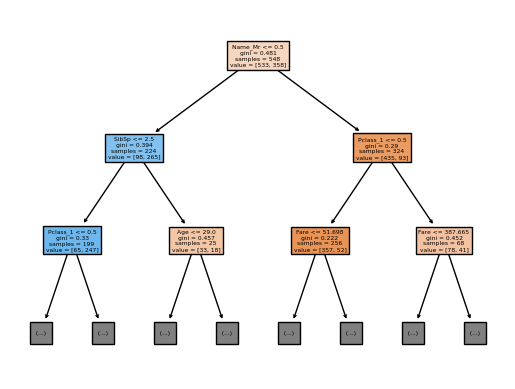

In [26]:
plot_tree(clf.estimators_[0], 
          feature_names=combine.columns,
          filled=True,
          max_depth=2
          )

In [27]:
clf = RandomForestClassifier(n_estimators=81, max_depth=7)
clf.fit(x,y)
pre = clf.predict(predict_x)
result = pd.DataFrame({
    "PassengerId":predict["PassengerId"],
    "Survived": pre
})
result.to_csv("rf0908.csv", encoding="utf-8", index=False)
result

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [28]:
predict_x

array([[34.5,  0. ,  0. , ...,  0. ,  1. ,  0. ],
       [47. ,  1. ,  0. , ...,  0. ,  1. ,  1. ],
       [62. ,  0. ,  0. , ...,  1. ,  0. ,  0. ],
       ...,
       [38.5,  0. ,  0. , ...,  0. ,  1. ,  0. ],
       [28. ,  0. ,  0. , ...,  0. ,  1. ,  0. ],
       [28. ,  1. ,  1. , ...,  0. ,  1. ,  2. ]])

In [29]:
pd.DataFrame({
    "Name": combine.columns,
    "Importance": clf.feature_importances_
}).sort_values(by="Importance", ascending=False)

,Name,Importance
10,Sex_male,0.145637
9,Sex_female,0.138708
7,Name_Mr,0.129667
4,Fare,0.104181
0,Age,0.066803
24,Pclass_3,0.060745
3,Ticket,0.059863
25,Family,0.052007
6,Name_Miss,0.040100
8,Name_Mrs,0.037214


<AxesSubplot: xlabel='Sex', ylabel='count'>

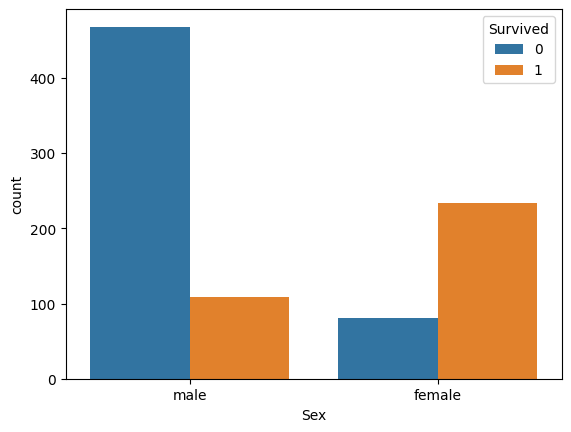

In [30]:
import seaborn as sns
# 用seaborn一定要用matplotlib
import matplotlib.pyplot as plt
sns.countplot(x=datas["Sex"], hue=datas["Survived"])

Text(0.5, 1.0, 'Fare vs Survived')

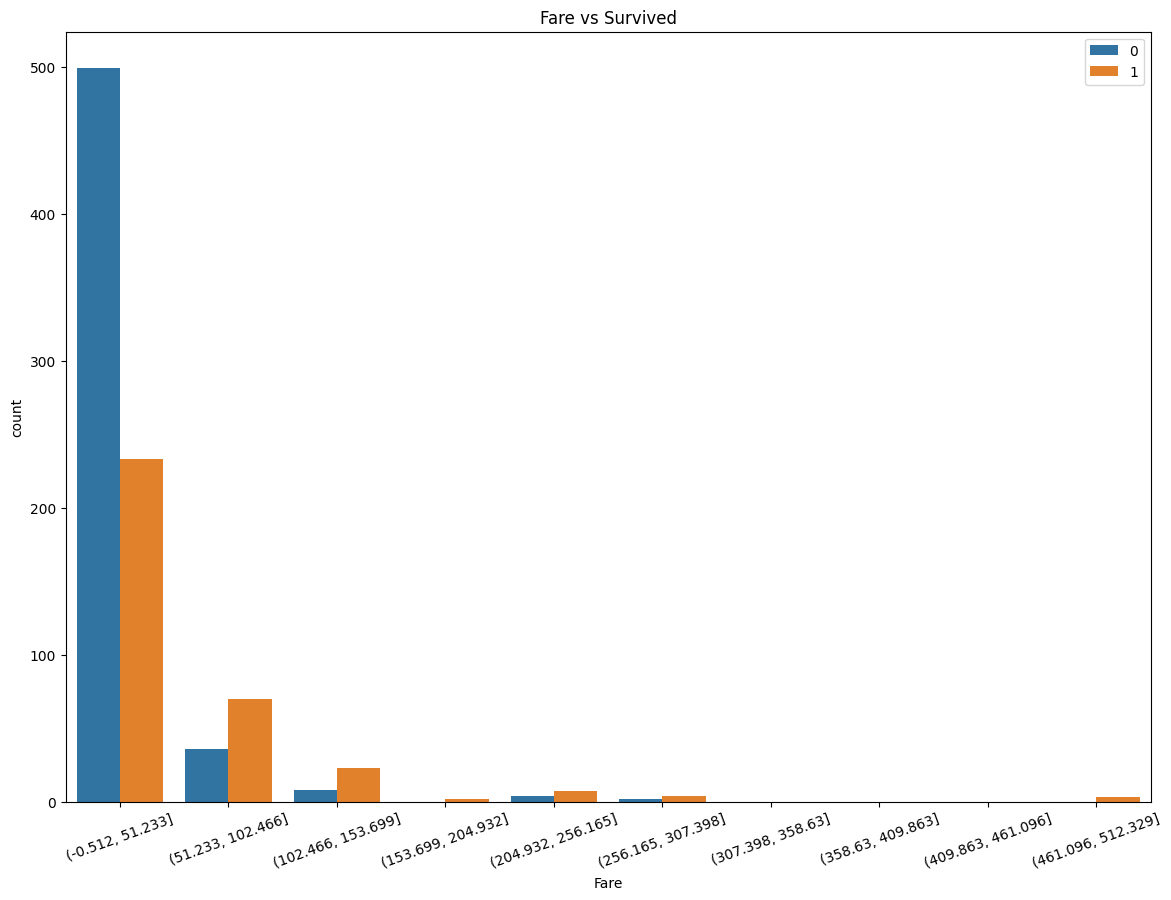

In [31]:
# palette選顏色: https://seaborn.pydata.org/tutorial/color_palettes.html
plt.figure(figsize=(14,10))
c = pd.cut(datas["Fare"], 10)
sns.countplot(x=c, hue=datas["Survived"])
#  ticket/legend/title/axis
plt.xticks(rotation=20)
plt.legend(loc="upper right")
plt.title("Fare vs Survived")


Text(0.5, 1.0, 'Age vs Survived')

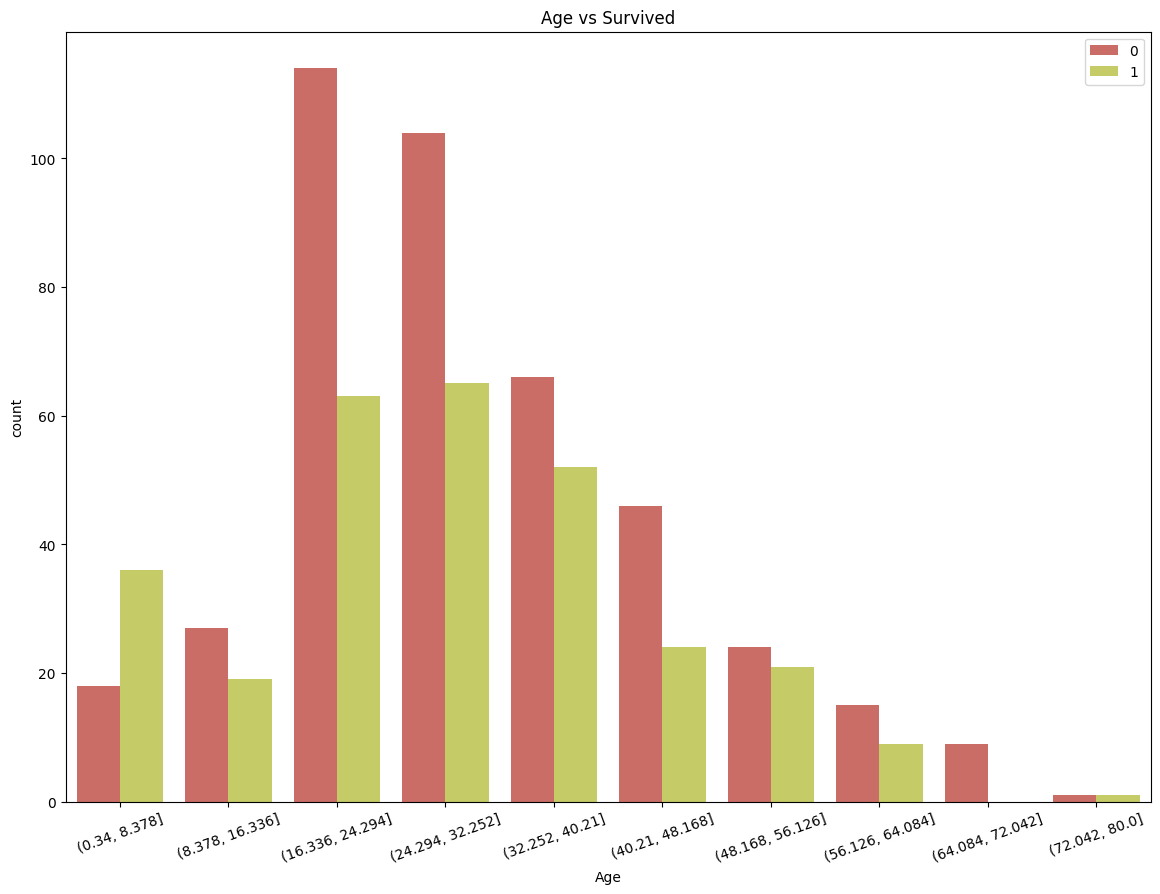

In [32]:
plt.figure(figsize=(14,10))
c = pd.cut(datas["Age"], 10)
sns.countplot(x=c, hue=datas["Survived"], palette=sns.color_palette("hls"))
#  ticket/legend/title/axis
plt.xticks(rotation=20)
plt.legend(loc="upper right")
plt.title("Age vs Survived")

In [33]:
# 討論. kNN/RF
# kNN: 局部性演算法, 優勢是啟動資料需要比較少
# RF: 全局性演算法, 優勢如果是資料夠多的時候, 效果應該不錯
# RF: 最大的優點是有feature_importance